In [1]:
from os.path import dirname, join, pardir
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import numpy as np
import math

from IPython.display import Image
from IPython.core.display import HTML

# Define Process Parameters

In [2]:
data_dir = "/Users/phivri/Documents/GitHub/Biosustain/MoGeoModel"

In [3]:
R = 8.314 # [m^3*Pa/K/mol]

#Temperature range:
T0 = 273.15
T = np.arange(T0, T0+80+1, 1)

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

# Biological Parameters Acetogen

### Energy Requirements for Growth and Overall Stoichiometry
\[REF] Heijnen J.J. (2010) Impact of Thermodynamic Principles in Systems Biology. In: Wittmann C., Krull R. (eds) Biosystems Engineering II. Advances in Biochemical Engineering / Biotechnology, vol 121. Springer, Berlin, Heidelberg. https://doi.org/10.1007/10_2009_63

In [4]:
m_GAM = 1000 #kJ/CmolX
print("m_GAM =", m_GAM, "[kJ/CmolX]")

m_GAM = 1000 [kJ/CmolX]


### Energy Requirements for Maintenance

\[REF]: L. Tijhuis, M.C. M. van Loosdrecht, and J. J. Heijnen, A Thermodynamically Based Correlation for Maintenance Gibbs Energy Requirements in Aerobic and Anaerobic Chemotrophic Growth 

<p> NGAM: </p>
<div style="text-align: center">  $ m_{NGAM} = 3.3^{6900/R*(1/298-1/T)} $ [$kJ/h/Cmol_{biomass}$]
    <span style="float:right;">(eq. 23)</span>
</div>

m_NGAM(300) = 1.25 [kJ/h/CmolX]


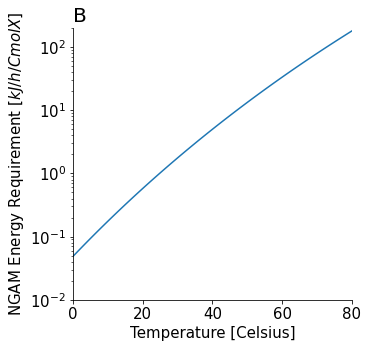

In [5]:
def m_NGAM(T):
    return 3.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]

print("m_NGAM(300) =", round(m_NGAM(300),2), "[kJ/h/CmolX]")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.figure(figsize=(5,5))
#plt.title(f"Anaerobic Maintenance Energy Requirements")
plt.title(f"B", fontdict = {'fontsize': 20}, loc = "left")
plt.axis([0, 80, 0.01, 200])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'NGAM Energy Requirement [$kJ/h/CmolX$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')
plt.plot(Kelvin_Celsius(T), m_NGAM(T))

## Maximum growth rate temeprature dependence

In [6]:
import pandas as pd

# data from: DOI: 10.3389/fmicb.2015.01275

species = pd.Series([
    "Rhodospirillum rubrum",
    "Caldanaerobacter subterraneus",
    "Carboxydocella sporoproducens",
    "Carboxydocella thermoautotrophica",
    "Carboxydothermus hydrogenoformans",
    "Carboxydothermus islandicus",
    "Carboxydothermus pertinax",
    "Carboxydothermus siderophilus",
    "Thermincola carboxydiphila",
    "Thermolithobacter carboxydivorans",
    "Thermosinus carboxydivorans",
    "Clostridium ljungdahlii",
    "Clostridium autoethanogenum",
    "Clostridium formicoaceticum",
    "Clostridium ragsdalei",
    "Clostridium scatologenes",
    "Clostridium drakei",
    "Clostridium carboxidivorans",
    "Alkalibaculum bacchi",
    "Butyribacterium methylotrophicum",
    "Moorella thermoautotrophica",
    "Oxobacter pfennigii",
    "Acetobacterium Woodii",
    "Blautia producta",
    "Clostridium aceticum",
    "Acetobacterium fimetarium",
    "Acetobacterium wieringae",
    "Blautia hydrogenotrophica",
    "Clostridium magnum",
    "Eubacterium aggregans",
    "Sporomusa acidovorans",
    "Sporomusa ovata",
    "Terrisporobacter mayombei",
    "Acetogenium kivui"])

ToptC = pd.Series([30,70,60,58,70,65,65,65,55,73,60,37,37,37,35,37,30,38,37,37,60,37,30,37,30,30,30,37,30,37,35,35,30,60], index = species, name='ToptC')
mumax = pd.Series([0.20,0.14,1.00,0.91,0.50,0.50,0.67,0.11,0.77,0.77,0.87,0.26,0.25,0.14,0.25,0.09,0.29,0.23,0.17,0.07,0.14,0.07,0.16,0.67,0.10,0.02,0.07,0.08,0.15,0.01,0.07,0.15,0.24,0.57], index = species, name = "mumax")


Acetogens = pd.concat([ToptC, mumax], axis=1)
Acetogens["ToptK"] = ToptC + 273.15
Acetogens

,ToptC,mumax,ToptK
Rhodospirillum rubrum,30,0.20,303.15
Caldanaerobacter subterraneus,70,0.14,343.15
Carboxydocella sporoproducens,60,1.00,333.15
Carboxydocella thermoautotrophica,58,0.91,331.15
Carboxydothermus hydrogenoformans,70,0.50,343.15
Carboxydothermus islandicus,65,0.50,338.15
Carboxydothermus pertinax,65,0.67,338.15
Carboxydothermus siderophilus,65,0.11,338.15
Thermincola carboxydiphila,55,0.77,328.15
Thermolithobacter carboxydivorans,73,0.77,346.15


### Plot and fit to the Arrhenius equation

<p> The Arrhenius equation for max growth rate:</p>
<div style="text-align: center">  $ µ_{max} = A*T*e^{-B/(R*T)} $ [$h^{-1}$]
    <span style="float:right;">(eq. 27)</span>
</div>

A = 8.664637604856871, B = 24166.931701462072


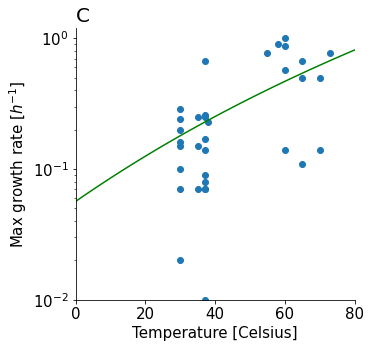

In [7]:
from scipy.optimize import curve_fit

def func(T, A, B):
     return A * T * np.exp(-B/(R*T))
    
popt, pcov = curve_fit(func, Acetogens.ToptK, Acetogens.mumax)

print(f"A = {popt[0]}, B = {popt[1]}")

plt.figure(figsize=(5,5))
plt.title(f"C", fontdict = {'fontsize': 20}, loc = "left")
plt.axis([0, 80, 0.01, 1.2])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'Max growth rate [$h^{-1}$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot(Kelvin_Celsius(T), func(T, *popt), 'g-', label='fit')
plt.scatter(Kelvin_Celsius(Acetogens.ToptK), Acetogens.mumax)
plt.yscale('log')

def µ(T):
    return popt[0]*T*np.exp(-popt[1]/(R*T)) #[/h]

# Calculate Gibbs Free Energy and Enthalpy

<p>Catabolic reaction stoichiometries:</p>

<p>$ 2 CO_2 + 4 H_2 <=> CH_3COOH + 2 H_2O $ 
    <span style="float:right;">(eq. 19)</span> </p>
<p>$ 4 CO + 2 H_2O <=> CH_3COOH + 2 CO_2 $
    <span style="float:right;">(eq. 20)</span> </p>

<p>Anabolic reaction stoichiometries:</p>

<p>$ CO_2 + 2.1 H_2 + 0.2 NH_3 <=> CH_{1.8}O_{0.5}N_{0.2} + 1.5 H_2O$
    <span style="float:right;">(eq. 21)</span>  </p>
<p>$ 2.1 CO + 0.6 H_2O + 0.2 NH_3 <=> CH_{1.8}O_{0.5}N_{0.2} + 1.1 CO_2$
    <span style="float:right;">(eq. 22)</span> </p>

<p>Gibbs free energy of reaction: </p>
<div style="text-align: center">  $ \Delta _r G^0 = \sum_i v_i * \Delta _fG_i^0$ [$kJ/mol$]
    <span style="float:right;">(eq. 24)</span>
</div>

<p>Reaction enthalpy: </p>
<div style="text-align: center">  $ \Delta _r H^0 = \sum_i v_i * \Delta _fH_i^0$ [$kJ/mol$]
    <span style="float:right;">(eq. 25)</span>
</div>

<p>Gibbs-Helmoltz equation: </p>
<div style="text-align: center">  $ \Delta _r G^T = \Delta _r G^0*(T/298.15) +\Delta _r H^0 * (1-T/298.15) $ [$kJ/mol$]
    <span style="float:right;">(eq. 26)</span>
</div>

Gibbs energy:
  DrG0_carb = -155.7 [kJ/mol]
  DrG0_hom = -75.3 [kJ/mol]

Enthalpy:
  DrH0_carb = -258.7 [kJ/mol]
  DrH0_hom = -266.3 [kJ/mol]

Temperature corrected Gibbs energy:
  DrGT_carb = -155.1 [kJ/mol]
  DrGT_hom = -74.1 [kJ/mol]


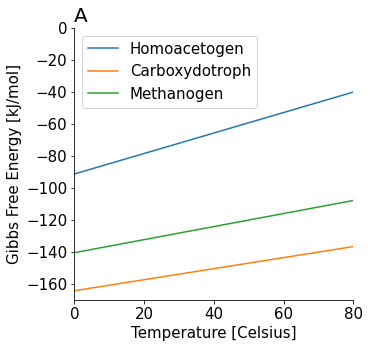

In [8]:
#Gibbs energy of Formation at 298.15
DfG0_actn = -159.7 #[kJ/mol]
DfG0_actt = -389.9 #[kJ/mol]
DfG0_co2 = -394.4 #[kJ/mol]
DfG0_co = -137.2 #[kJ/mol]
DfG0_h2o = -237.1 #[kJ/mol]
DfG0_h2 = 0 #[kJ/mol]
DfG0_ch4 = -50.53 #[kJ/mol]

#standard molar enthalpy
DfH0_actn = -249.4 #[KJ/mol]
DfH0_actt = -483.5 #[KJ/mol]
DfH0_co2 = -394.4 #[KJ/mol]
DfH0_co = -110.5 #[KJ/mol]
DfH0_h2o = -285.8 #[KJ/mol]
DfH0_h2 = 0 #[KJ/mol]
DfH0_ch4 = -74.8 #[KJ/mol]

#Hess's law:
DrG0_carb = -4*DfG0_co - 2*DfG0_h2o + DfG0_actt + 2*DfG0_co2
DrG0_hom = -4*DfG0_h2 - 2*DfG0_co2 + DfG0_actt + 2*DfG0_h2o
DrG0_met = -1*DfG0_co2 - 4*DfG0_h2 + DfG0_ch4 + 2*DfG0_h2o

print("Gibbs energy:\n",
      " DrG0_carb =",round(DrG0_carb,1),"[kJ/mol]\n",
      " DrG0_hom =",round(DrG0_hom,1),"[kJ/mol]\n")

DrH0_carb = -4*DfH0_co - 2*DfH0_h2o + DfH0_actt + 2*DfH0_co2
DrH0_hom = -4*DfH0_h2 - 2*DfH0_co2 + DfH0_actt + 2*DfH0_h2o
DrH0_met = -1*DfH0_co2 - 4*DfH0_h2 + DfH0_ch4 + 2*DfH0_h2o

print("Enthalpy:\n",
      " DrH0_carb =", round(DrH0_carb,1),"[kJ/mol]\n",
      " DrH0_hom =", round(DrH0_hom,1),"[kJ/mol]\n")

#Gibbs–Helmholtz equation for temperature correction
def DrGT_carb(T):
    return DrG0_carb * (T/298.15) + DrH0_carb * (1-T/298.15)
def DrGT_hom(T):
    return DrG0_hom * (T/298.15) + DrH0_hom * (1-T/298.15)
def DrGT_met(T):
    return DrG0_met * (T/298.15) + DrH0_met * (1-T/298.15)

print("Temperature corrected Gibbs energy:\n",
      " DrGT_carb =",round(DrGT_carb(300),1),"[kJ/mol]\n",
      " DrGT_hom =",round(DrGT_hom(300),1),"[kJ/mol]")

#dropped concentration correction, in accordance with book

plt.figure(figsize=(5,5))
#plt.title(f"Gibbs Free Energy of Acetogenesis and Methanogenesis")
plt.title("A", fontdict = {'fontsize': 20}, loc = "left")
plt.axis([0, 80, -170, 0])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel('Gibbs Free Energy [kJ/mol]', fontsize=15)
plt.plot(Kelvin_Celsius(T), DrGT_hom(T))
plt.plot(Kelvin_Celsius(T), DrGT_carb(T))
plt.plot(Kelvin_Celsius(T), DrGT_met(T))
plt.legend(['Homoacetogen','Carboxydotroph','Methanogen'], fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)


<p>Aerobic degradation of Acetate:</p>

<div style="text-align: center"> $ CH_3OOH + 2 O^2 => 2 CO_2 + 2 H_2O$<br>
$ \Delta _r G = -899.5$ [$kJ/mol$]
    <span style="float:right;">(eq. 31)</span>  </p>

## Express Yields as temperature dependent functions

<p>Given the reaction stoichiometries:</p>

<p>Homoacetogenic</p>
<p>$ -2 CO_2 - 4 H_2 + CH_3COOH + 2 H_2O = 0$</p>
<p>$ -CO_2 - 2.1 H_2 - 0.2 NH_3 + CH_{1.8}O_{0.5}N_{0.2} + 1.5 H_2O = 0$ </p>
<p>Carboxydotrophic</p>
<p>$ -4 CO - 2 H_2O + CH_3COOH + 2 CO_2 = 0$</p>
<p>$ -2.1 CO - 0.6 H_2O - 0.2 NH_3 + CH_{1.8}O_{0.5}N_{0.2} + 1.1 CO_2 = 0$</p>
<p>Methanogenic</p>
<p>$ -CO2 - 4 H_2 + CH_4 + 2 H_2O = 0$</p>




Y_PS carb at 30°C : 0.173
Y_PS carb at 60°C : 0.215
Y_PS hom at 30°C : 0.207
Y_PS hom at 60°C : 0.236
change of Y_PS carb at 30-60°C:  1.247
change of Y_PS hom at 30-60°C:  1.142
change of Y_XS carb at 30-60°C:  0.448
change of Y_XS hom at 30-60°C:  0.322


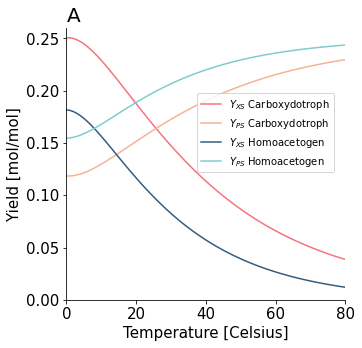

In [10]:
#µ = 0.3#[/h]

def R_X(T):
    return 1 + T*0

def R_CO_carb(T):
    m_G = 0.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]
    DrGT_carb = DrG0_carb * (T/298.15) + DrH0_carb * (1-T/298.15)
    return -4 * (-(m_G+m_GAM*µ(T))/DrGT_carb) -2.1

def R_actt_carb(T):
    m_G = 0.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]
    DrGT_carb = DrG0_carb * (T/298.15) + DrH0_carb * (1-T/298.15)
    return -(m_G+m_GAM*µ(T))/DrGT_carb

def R_H2_hom(T):
    m_G = 0.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]
    DrGT_hom = DrG0_hom * (T/298.15) + DrH0_hom * (1-T/298.15)
    return -4 * (-(m_G+m_GAM*µ(T))/DrGT_hom) -2.1

def R_actt_hom(T):
    m_G = 0.3**(69000/R*(1/298-1/T)) #[kJ/h/CmolX]
    DrGT_hom = DrG0_hom * (T/298.15) + DrH0_hom * (1-T/298.15)
    return -(m_G+m_GAM*µ(T))/DrGT_hom

plt.figure(figsize=(5,5))
plt.title("A", fontdict = {'fontsize': 20}, loc = "left")
#plt.title(f"Yields of Acetogenesis on Electron donor")
plt.axis([0, 80, 0, 0.26])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel('Yield [mol/mol]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot(Kelvin_Celsius(T), -R_X(T)/R_CO_carb(T), color='#F67280')
plt.plot(Kelvin_Celsius(T), -R_actt_carb(T)/R_CO_carb(T), color='#F8B195')
plt.plot(Kelvin_Celsius(T), -R_X(T)/R_H2_hom(T), color='#355C7D')
plt.plot(Kelvin_Celsius(T), -R_actt_hom(T)/R_H2_hom(T), color='#7ECCCC')
#plt.legend(['Y_PS Carboxydotroph','Y_PS Homoacetogenic'])
#plt.label(bbox_to_anchor = [0.5, 0.2])
plt.legend([r'$Y_{XS}$ Carboxydotroph',r'$Y_{PS}$ Carboxydotroph',r'$Y_{XS}$ Homoacetogen',r'$Y_{PS}$ Homoacetogen'],bbox_to_anchor=(0.45, 0.45))

print("Y_PS carb at 30°C :", round(-R_actt_carb(Celsius_Kelvin(30))/R_CO_carb(Celsius_Kelvin(30)),3))
print("Y_PS carb at 60°C :", round(-R_actt_carb(Celsius_Kelvin(60))/R_CO_carb(Celsius_Kelvin(60)),3))
print("Y_PS hom at 30°C :", round(-R_actt_hom(Celsius_Kelvin(30))/R_H2_hom(Celsius_Kelvin(30)),3))
print("Y_PS hom at 60°C :", round(-R_actt_hom(Celsius_Kelvin(60))/R_H2_hom(Celsius_Kelvin(60)),3))

print("change of Y_PS carb at 30-60°C: ", 
      round((-R_actt_carb(Celsius_Kelvin(60))/R_CO_carb(Celsius_Kelvin(60)))/
             (-R_actt_carb(Celsius_Kelvin(30))/R_CO_carb(Celsius_Kelvin(30))),3))
print("change of Y_PS hom at 30-60°C: ", 
      round((-R_actt_hom(Celsius_Kelvin(60))/R_H2_hom(Celsius_Kelvin(60)))/
             (-R_actt_hom(Celsius_Kelvin(30))/R_H2_hom(Celsius_Kelvin(30))),3))

print("change of Y_XS carb at 30-60°C: ", 
      round((-R_X(Celsius_Kelvin(60))/R_CO_carb(Celsius_Kelvin(60)))/
             (-R_X(Celsius_Kelvin(30))/R_CO_carb(Celsius_Kelvin(30))),3))
print("change of Y_XS hom at 30-60°C: ", 
      round((-R_X(Celsius_Kelvin(60))/R_H2_hom(Celsius_Kelvin(60)))/
             (-R_X(Celsius_Kelvin(30))/R_H2_hom(Celsius_Kelvin(30))),3))

In [ ]:
plt.figure(figsize=(5,5))
plt.title("B", fontdict = {'fontsize': 20}, loc = "left")
#plt.title(f"Product to biomass ratio in Acetogenesis")
plt.axis([0, 80, 0, 15])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel('Yield [mol/Cmol]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.plot(Kelvin_Celsius(T), R_actt_carb(T)/R_X(T), color='#F67280')
plt.plot(Kelvin_Celsius(T), R_actt_hom(T)/R_X(T), color='#7ECCCC')

plt.legend([r'$Y_{PX}$ Carboxydotroph',r'$Y_{PX}$ Homoacetogen'])

In [ ]:
print(round(R_actt_hom(Celsius_Kelvin(30))/R_X(Celsius_Kelvin(30)),2))
print(round(R_actt_hom(Celsius_Kelvin(60))/R_X(Celsius_Kelvin(60)),2))

print("increase homoacet. 30-60°C: ", round((R_actt_hom(Celsius_Kelvin(60))/R_X(Celsius_Kelvin(60)))/(R_actt_hom(Celsius_Kelvin(30))/R_X(Celsius_Kelvin(30))),2))

print(round(R_actt_carb(Celsius_Kelvin(30))/R_X(Celsius_Kelvin(30)),2))
print(round(R_actt_carb(Celsius_Kelvin(60))/R_X(Celsius_Kelvin(60)),2))

print("increase carboxy. 30-60°C: ", round((R_actt_carb(Celsius_Kelvin(60))/R_X(Celsius_Kelvin(60)))/(R_actt_carb(Celsius_Kelvin(30))/R_X(Celsius_Kelvin(30))),2))

In [ ]:
plt.figure(figsize=(5,5))
plt.title(f"Biomass to Product ratio in Acetogenesis")
plt.axis([0, 80, 0, 0.6])
plt.xlabel('Temperature [Celsius]')
plt.ylabel('Yield [mol/mol]')
plt.plot(Kelvin_Celsius(T), R_X(T)/R_actt_carb(T), color='#F67280')
plt.plot(Kelvin_Celsius(T), R_X(T)/R_actt_hom(T), color='#7ECCCC')

plt.legend([r'$Y_{XP}$ Carboxydotroph',r'$Y_{XP}$ Homoacetogen'])